In [1]:
from typing import List, Optional, Union

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import utils as u
from models import morales2009, pentzer2014pow, pentzer2022
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
m_abbrs = u.abbrange("M", 1, 8)
s_abbrs = (*u.abbrange("S", 1, 8), "S09", "S10")
abbrs = (*m_abbrs, *s_abbrs)
colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

dashes = {
    "rotational": "-",
    "linear": ":",
}
rotational = (*u.abbrange("M", 3, 7), "S06", "S07", "S09", "S10")


def add_legends(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure]):
    patch = lambda d, c: plt.plot([], [], ls=d, color=c)[0]

    terr_legend_labels, terr_legend_handles = colors.keys(), colors.values()
    terr_legend_handles = [patch("-", col) for col in terr_legend_handles]
    run_legend_labels, run_legend_handles = dashes.keys(), dashes.values()
    run_legend_handles = [patch(dash, "k") for dash in run_legend_handles]

    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    terrain_legend = mpl_elem.legend(
        handles=terr_legend_handles,
        labels=terr_legend_labels,
        bbox_to_anchor=(0, -0.03),
        loc="upper left",
        title="Terrain",
    )
    mpl_elem.add_artist(terrain_legend)

    run_legend = mpl_elem.legend(
        handles=run_legend_handles,
        labels=run_legend_labels,
        bbox_to_anchor=(1, -0.03),
        loc="upper right",
        title="Type of run",
    )
    mpl_elem.add_artist(run_legend)


In [3]:
m2009_dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    m2009df = morales2009.morales2009(abbr, verbose=False);
    m2009_dfs[abbr] = m2009df

S10: 100%|██████████| 16/16 [00:00<00:00, 92.80it/s]


In [4]:
p2014_dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    p2014df = pentzer2014pow.pentzer2014pow(abbr, verbose=False);
    p2014_dfs[abbr] = p2014df

S10: 100%|██████████| 16/16 [00:00<00:00, 2045.07it/s]


In [5]:
p2022_dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    p2022df = pentzer2022.pentzer2022(abbr, verbose=False);
    p2022_dfs[abbr] = p2022df


S10: 100%|██████████| 16/16 [00:00<00:00, 6431.75it/s]


# Morales 2009

In [6]:
model_name = morales2009.__MODEL_NAME__.title()
figdir = u.get_figdir("summary", subdir=f"warthog-mmp/{model_name}")
model_name = morales2009.__MODEL_NAME__.title()

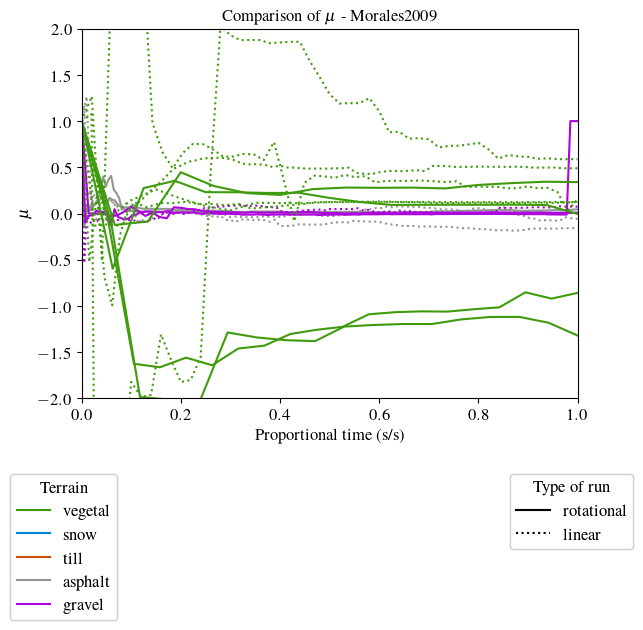

In [7]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        m2009_dfs[abbr].time_prop,
        m2009_dfs[abbr].m_sym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
ax.set_ylim(bottom=-2, top=2)
ax.set_xlim(left=0, right=1)
add_legends(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$\mu$")
ax.set_title(f"Comparison of $\mu$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_mu.{ext}", bbox_inches="tight")


# Pentzer2014

In [8]:
model_name = pentzer2014pow.__MODEL_NAME__.title()
figdir = u.get_figdir("summary", subdir=f"warthog-mmp/{model_name}")
model_name = pentzer2014pow.__MODEL_NAME__.title()

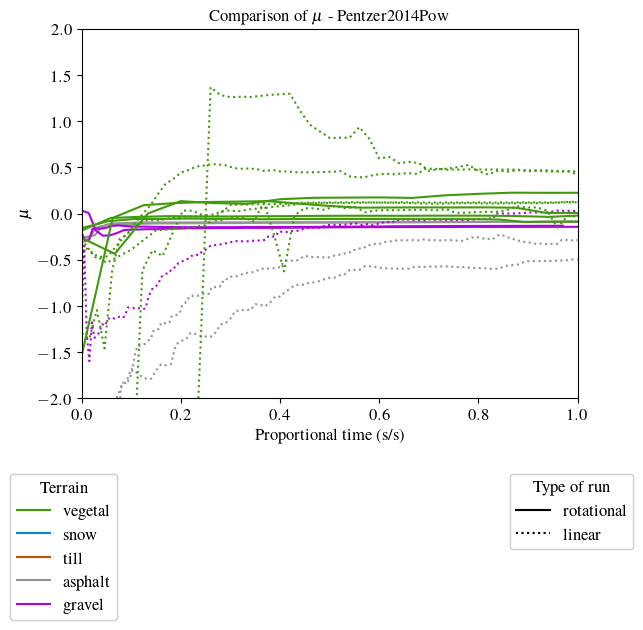

In [9]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        p2014_dfs[abbr].time_prop,
        p2014_dfs[abbr].m_sym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
ax.set_ylim(bottom=-2, top=2)
ax.set_xlim(left=0, right=1)
add_legends(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$\mu$")
ax.set_title(f"Comparison of $\mu$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_mu.{ext}", bbox_inches="tight")


# Pentzer 2022

In [10]:
model_name = pentzer2022.__MODEL_NAME__.title()
figdir = u.get_figdir("summary", subdir=f"warthog-mmp/{model_name}")
model_name = pentzer2022.__MODEL_NAME__.title()


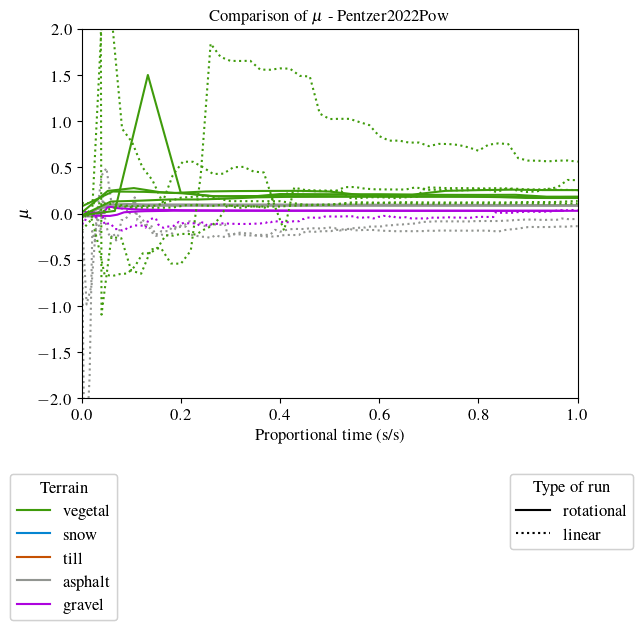

In [11]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        p2022_dfs[abbr].time_prop,
        p2022_dfs[abbr].m_sym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
ax.set_ylim(bottom=-2, top=2)
ax.set_xlim(left=0, right=1)
add_legends(fig)
ax.set_xlabel("Proportional time (s/s)")
ax.set_ylabel("$\mu$")
ax.set_title(f"Comparison of $\mu$ - {model_name}")

for ext in u.EXTS:
    fig.savefig(figdir / f"{model_name}_mu.{ext}", bbox_inches="tight")


# =======

NameError: name 'dfs' is not defined

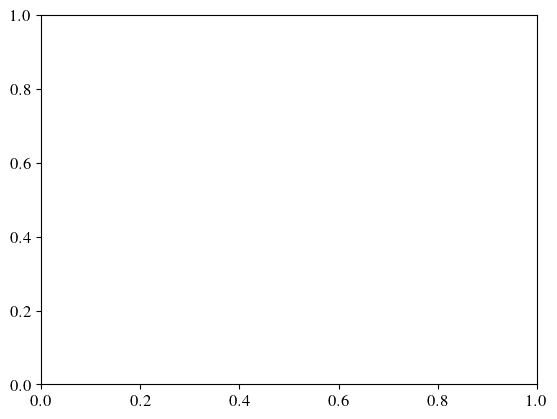

In [12]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        dfs[abbr].time_rel,
        dfs[abbr].G_sym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
# ax.set_ylim((240,280))
add_legends(fig)
ax.set_ylabel("$G_{sym}$ [N]", x=-0.05)
ax.set_xlabel("Duration (s)")
ax.set_title(f"{' vs '.join(abbrs)} - $G_{{sym}}$ : Gora RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_gora01_G_sym.jpg", bbox_inches="tight")


In [ ]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        dfs[abbr].time_rel,
        dfs[abbr].m_asym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
ax.set_ylim((-1, 4))
add_legends(fig)
ax.set_ylabel("$\mu_{asym}$", x=-0.05)
ax.set_xlabel("Duration (s)")
ax.set_title(f"{' vs '.join(abbrs)} - $\mu_{{asym}}$ : Gora RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_gora02_m_asym.jpg", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        dfs[abbr].time_rel,
        dfs[abbr].G_asym,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
# ax.set_ylim((240,260))
add_legends(fig)
ax.set_ylabel("$G_{asym}$ [N]", x=-0.05)
ax.set_xlabel("Duration (s)")
ax.set_title(f"{' vs '.join(abbrs)} - $G_{{asym}}$ : Gora RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_gora03_G_asym.jpg", bbox_inches="tight")


In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        dfs[abbr].time_rel,
        dfs[abbr].P_err_conv,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
ax.set_ylim(-200, 200)
add_legends(fig)
ax.set_ylabel("$P_{err}$", x=-0.05)
ax.set_xlabel("Duration (s)")
ax.set_title(f"{' vs '.join(abbrs)} - $P_{{err}}$ : Gora RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_gora04_error_conv.jpg", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))

for abbr in abbrs:
    col = cols[abbr]
    dash = dashes["rotational"] if abbr in rotational else dashes["linear"]
    ax.plot(
        dfs[abbr].time_rel,
        dfs[abbr].P_err_t,
        color=col,
        linestyle=dash,
        label=abbr,
        markersize=1,
    )
# ax1.legend()
# ax2.legend()
ax.set_ylim(-200, 200)
add_legends(fig)
ax.set_ylabel("$P_{err}$", x=-0.05)
ax.set_xlabel("Duration (s)")
ax.set_title(f"{' vs '.join(abbrs)} - $P_{{err}}$ : Gora RLS")

fig.savefig(ssmrkgifs / f"{''.join(abbrs)}_gora05_error_t.jpg", bbox_inches="tight")